# CS 533 - Assignment 3: Loan Default
### Author : Farhana Alam
Date of Submission: 10/27/2019

### Objective:
The goal of this assignment is to develop and asses the ability to build a logistic regression model to predict the discrete outcomes and analyze/interpret the reason about its effectiveness.
### Context and Data
For this assignment, we will be using a loan data set issued to small businesses in California provided by the U.S. Small Business Administration (SBA). The output variable of this data set is "Default" which is 1 if the loan ended in default and 0 if it was paid in full.

The data set contains several differnet independent variables. Many of these variables are redundant/not relevant. Our goal in this assignment is to predict the loan "Default" using the most relevant varaiables from the data set and assist lender to estimate whethe the loan is risk or not (in a binary outcome). Finally We will calculate the accuracy of our model and cost function. We will also show the how the accuracy and cost function changes with the selection of the threshold value.

### Importing Python Packages for Logistic Regression Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
%matplotlib inline

### Load data
First read the .csv file which contains loan data for Califonia.

In [ ]:
sba_data = pd.read_csv('SBAcase.11.13.17.csv')

Now I have read the data. Lets get a quick look about the data.

In [ ]:
sba_data.head()

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,0,1004285007,SIMPLEX OFFICE SOLUTIONS,ANAHEIM,CA,92801,CALIFORNIA BANK & TRUST,CA,532420,15074,...,0,30000,15000,0,0,0.5,0,1080,16175.0,0
1,1,1004535010,DREAM HOME REALTY,TORRANCE,CA,90505,CALIFORNIA BANK & TRUST,CA,531210,15130,...,0,30000,15000,0,0,0.5,1,1680,17658.0,0
2,0,1005005006,"Winset, Inc. dba Bankers Hill",SAN DIEGO,CA,92103,CALIFORNIA BANK & TRUST,CA,531210,15188,...,0,30000,15000,0,0,0.5,0,1080,16298.0,0
3,1,1005535001,Shiva Management,SAN DIEGO,CA,92108,CALIFORNIA BANK & TRUST,CA,531312,15719,...,0,50000,25000,0,0,0.5,0,1080,16816.0,0
4,1,1005996006,"GOLD CROWN HOME LOANS, INC",LOS ANGELES,CA,91345,SBA - EDF ENFORCEMENT ACTION,CO,531390,16840,...,0,343000,343000,0,1,1.0,0,7200,24103.0,0


Check the basic characteristics of the data set:

In [ ]:
sba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 35 columns):
Selected             2102 non-null int64
LoanNr_ChkDgt        2102 non-null int64
Name                 2102 non-null object
City                 2102 non-null object
State                2102 non-null object
Zip                  2102 non-null int64
Bank                 2099 non-null object
BankState            2099 non-null object
NAICS                2102 non-null int64
ApprovalDate         2102 non-null int64
ApprovalFY           2102 non-null int64
Term                 2102 non-null int64
NoEmp                2102 non-null int64
NewExist             2101 non-null float64
CreateJob            2102 non-null int64
RetainedJob          2102 non-null int64
FranchiseCode        2102 non-null int64
UrbanRural           2102 non-null int64
RevLineCr            2100 non-null object
LowDoc               2099 non-null object
ChgOffDate           697 non-null float64
DisbursementDate     2

The data table has 35 columns and 2102 rows (individual entries)

In this project, we will develop a logisstic regression model to predict loan "Default" (which is 1 if the loan ended in default and 0 if it was paid in full) using New, RealEstate, Portion, and Recession variavles. Reducing the table columns keeping these variables (New, RealEstate, Portion, Recession) and several others to make it more redable.

In [ ]:
sba_data = sba_data[['Name','CreateJob','DisbursementGross', 'New','RealEstate', 'Portion','Recession', 'Default']]

In [ ]:
sba_data.head()

,Name,CreateJob,DisbursementGross,New,RealEstate,Portion,Recession,Default
0,SIMPLEX OFFICE SOLUTIONS,0,32812,0,0,0.5,0,0
1,DREAM HOME REALTY,0,30000,0,0,0.5,1,0
2,"Winset, Inc. dba Bankers Hill",0,30000,0,0,0.5,0,0
3,Shiva Management,0,50000,0,0,0.5,0,0
4,"GOLD CROWN HOME LOANS, INC",3,343000,0,1,1.0,0,0


Check if there is any missing values for the output variable by calling the isnull() metohd and sum function.

In [ ]:
sba_data.isnull().sum()

Name                 0
CreateJob            0
DisbursementGross    0
New                  0
RealEstate           0
Portion              0
Recession            0
Default              0
dtype: int64

So there is no missing values for the outcome "Default" and independent variables of interest.

## Section 1
Split the data set into training set and test set. Choosings 25% of the total data for test set.

In [ ]:
test_sba = sba_data.sample(frac = 0.25)

In [ ]:
train_mask = pd.Series(True, index=sba_data.index)
train_mask[test_sba.index] = False
train_sba = sba_data[train_mask]
train_sba.head()

,Name,CreateJob,DisbursementGross,New,RealEstate,Portion,Recession,Default
0,SIMPLEX OFFICE SOLUTIONS,0,32812,0,0,0.5,0,0
1,DREAM HOME REALTY,0,30000,0,0,0.5,1,0
2,"Winset, Inc. dba Bankers Hill",0,30000,0,0,0.5,0,0
3,Shiva Management,0,50000,0,0,0.5,0,0
4,"GOLD CROWN HOME LOANS, INC",3,343000,0,1,1.0,0,0


## Section 2
Generate a logistic regression model to predict "Default" using New, RealEstate, Portion, and Recession variables.

In [ ]:
model = smf.glm('Default ~ New+RealEstate+Portion+Recession', train_sba, family=sm.families.Binomial()).fit()

#### (a)
Now we have the logistic regression model, let's have a look at the summray of the model.

In [ ]:
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Default   No. Observations:                 1576
Model:                            GLM   Df Residuals:                     1571
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -819.24
Date:                Mon, 18 Nov 2019   Deviance:                       1638.5
Time:                        09:57:17   Pearson chi2:                 1.48e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5999      0.261      6.126      0.0

Since p-value is larger than 0.05 for variable "New", its impact to predit the loan defaulter is not statistically signficant. So we can delete "New" from the logistic regression model formula.

#### (b)
Now I will re-generate the regression model after droping "New" variable.

In [ ]:
sba_data.drop(['New'], axis=1, inplace = True)
sba_data.head()

,Name,CreateJob,DisbursementGross,RealEstate,Portion,Recession,Default
0,SIMPLEX OFFICE SOLUTIONS,0,32812,0,0.5,0,0
1,DREAM HOME REALTY,0,30000,0,0.5,1,0
2,"Winset, Inc. dba Bankers Hill",0,30000,0,0.5,0,0
3,Shiva Management,0,50000,0,0.5,0,0
4,"GOLD CROWN HOME LOANS, INC",3,343000,1,1.0,0,0


In [ ]:
model = smf.glm('Default ~ RealEstate+Portion+Recession', train_sba, family=sm.families.Binomial()).fit()

In [ ]:
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Default   No. Observations:                 1576
Model:                            GLM   Df Residuals:                     1572
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -819.27
Date:                Mon, 18 Nov 2019   Deviance:                       1638.5
Time:                        09:57:18   Pearson chi2:                 1.48e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5963      0.261      6.122      0.0

After droping "New" from the regression model, p-values for "RealEstate", "Portion" and "Recession" all have <0.05. So they all are statistically signifinat in prediction the outcome variable.

## Section 3
In this section, we will predict the outcome for the test set and calculate the accuracy of the model using a threshold of 0.5.

In [ ]:
test_sba['Risk_factor'] = model.predict(test_sba)
##test_sba.head()

Let's set the Decision to be a high risk (1 or True) if Risk_factor (estimated probability) is at least 0.5.

In [ ]:
test_sba['Decision'] = test_sba['Risk_factor'] >= 0.5
test_sba.head()

,Name,CreateJob,DisbursementGross,New,RealEstate,Portion,Recession,Default,Risk_factor,Decision
1578,OXFORD REALTY & INVESTMENT,5,603000,0,1,0.75,0,0,0.052726,False
177,"Caruthers Valuation Group, Inc",0,133922,0,0,0.50,0,1,0.490678,False
987,SOUTHWEST COAST CONSTRUCTION I,4,10000,1,0,0.85,0,0,0.234911,False
253,"Birchleaf, Inc. dba Hidden Riv",0,39384,1,0,0.50,0,1,0.490678,False
1224,WINGED DRAGON VIDEO & FROZEN Y,0,60000,0,0,0.80,0,0,0.265528,False


In [ ]:
accuracy=(test_sba['Default']==test_sba['Decision']).mean()
##accuracy_percentage=accuracy*100
print("Accuracy of the model is {:0.2%}".format(accuracy))

Accuracy of the model is 68.63%


## Section 4
In this section, we will determine the accuracy of the 'majority class' classifier.

Lets first evaluate the more common output from the training data set.

In [ ]:
train_sba['Risk_factor_tr'] = model.predict(train_sba)
train_sba['Decision_tr'] = train_sba['Risk_factor_tr'] >= 0.5
train_sba.head()

C:\Users\Farhana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Farhana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Name,CreateJob,DisbursementGross,New,RealEstate,Portion,Recession,Default,Risk_factor_tr,Decision_tr
0,SIMPLEX OFFICE SOLUTIONS,0,32812,0,0,0.5,0,0,0.490678,False
1,DREAM HOME REALTY,0,30000,0,0,0.5,1,0,0.638579,True
2,"Winset, Inc. dba Bankers Hill",0,30000,0,0,0.5,0,0,0.490678,False
3,Shiva Management,0,50000,0,0,0.5,0,0,0.490678,False
4,"GOLD CROWN HOME LOANS, INC",3,343000,0,1,1.0,0,0,0.024004,False


In [ ]:
print('Number of training data set', len(train_sba))
print('Number of Default outcome', (train_sba['Decision_tr']==1).sum())
print('Number of not-Default outcome', (train_sba['Decision_tr']==0).sum())

Number of training data set 1576
Number of Default outcome 75
Number of not-Default outcome 1501


So, not-defaul is the more common output for the training data. So lets use not-default outcome to find the accuracy of the majority-class classifier

In [ ]:
test_sba['maj_class'] = False
accu_maj=(test_sba['Default']==test_sba['maj_class']).mean()
print("Accuracy of the majority class classifier is {:0.2%}".format(accu_maj))

Accuracy of the majority class classifier is 66.92%


## Section 5
In this section, we will comment on the relationship between the majority class accuracy and our classifier’s accuracy

In [ ]:
print("Majority class accuracy is {:0.2%}".format(accu_maj))
print("My classifier accuracy is {:0.2%}".format(accuracy))

Majority class accuracy is 66.92%
My classifier accuracy is 68.63%


So they are failry close.Majority class accuracy is approximately ~2% lower than my classifier accuracy.

## Section 6
Confusion Matrix for test data set:

In [ ]:
out_counts = test_sba.groupby(['Default','Decision'])['Risk_factor'].count()
out_counts

Default  Decision
0        False       342
         True         10
1        False       155
         True         19
Name: Risk_factor, dtype: int64

In [ ]:
conf_matrix=out_counts.unstack()
conf_matrix

Decision,False,True
Default,,
0,342,10
1,155,19


## Section 7
In this part, we will calculate the cost for the classifer. We will use the conf_matrix calculated in section 6 for the test data set.

In [ ]:
tp_val = 0
tn_val = 0
fp_val = 1
fn_val = 5

In [ ]:
Cost = conf_matrix.loc[0,0]*tn_val + conf_matrix.loc[0,1]*fp_val + conf_matrix.loc[1,0]*fn_val + conf_matrix.loc[1,1]*tp_val
print('The cost of classifier with a threshold of 0.5 is',Cost,'.')

The cost of classifier with a threshold of 0.5 is 785 .


## Section 8
In this section, we will show how the accuracy change with the threshold vlue. We will start with an array of threshold values and calulate the accuracy at each threshold value. Finally will plot threshold values in the x-axis and accuracy in the y-axis.

Text(0.5, 1.0, 'Accuracy vs. Threshold Level')

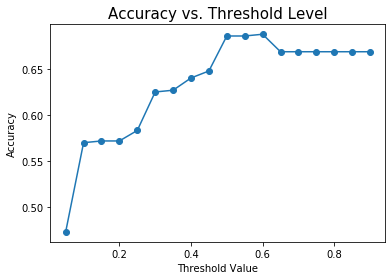

In [ ]:
threshold_level=np.arange(start=.05, stop=.91, step=.05)
Accuracy=[]

for x in threshold_level:
    test_sba['Decision'] = (test_sba['Risk_factor'] >= x)
    accuracy_rate=(test_sba['Default']==test_sba['Decision']).mean()
    Accuracy.append(accuracy_rate)

plt.plot(threshold_level, Accuracy, marker='o')
plt.xlabel('Threshold Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold Level', fontsize=15)

## Section 9
In this section, we will show how the cost changes with threshold level. We will use same threshold values that used to calcualte the accuracy in section 8.

Text(0.5, 1.0, 'Threshold vs. Cost')

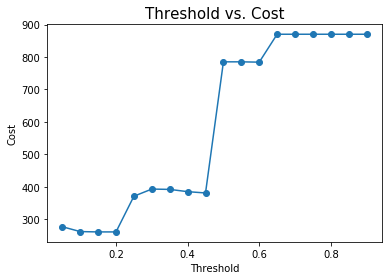

In [ ]:
Cost_change=[]

## These values were obtained from Assignment section 7.
tp_val = 0
tn_val = 0
fp_val = 1
fn_val = 5

for x in threshold_level:
    test_sba['Decision'] = test_sba['Risk_factor'] >= x
    outcome =np.array(test_sba['Default'])
    prediction = np.array(test_sba['Decision'])
    ##conf_matrix = confusion_matrix(outcome, prediction)
    TN, FP, FN, TP = confusion_matrix(outcome, prediction).ravel()

    Cost = TN*tn_val + FP*fp_val + FN*fn_val + TP*tp_val
    Cost_change.append(Cost)

plt.plot(threshold_level, Cost_change, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Cost')
plt.title('Threshold vs. Cost', fontsize=15)

Cost increases as threshold value increases.

## Section 10
Using sba_data from before.

In [ ]:
sba_data.head()

,Name,CreateJob,DisbursementGross,RealEstate,Portion,Recession,Default
0,SIMPLEX OFFICE SOLUTIONS,0,32812,0,0.5,0,0
1,DREAM HOME REALTY,0,30000,0,0.5,1,0
2,"Winset, Inc. dba Bankers Hill",0,30000,0,0.5,0,0
3,Shiva Management,0,50000,0,0.5,0,0
4,"GOLD CROWN HOME LOANS, INC",3,343000,1,1.0,0,0


Lets add two additional predictor variables "CreateJob" and "DisbursementGross" in the logistic regression model.

In [ ]:
formula2='Default ~ RealEstate+Portion+Recession+CreateJob+DisbursementGross'
model2 = smf.glm(formula2, train_sba, family=sm.families.Binomial()).fit()
print(model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Default   No. Observations:                 1576
Model:                            GLM   Df Residuals:                     1570
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -818.31
Date:                Mon, 18 Nov 2019   Deviance:                       1636.6
Time:                        09:57:19   Pearson chi2:                 1.51e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.5560      0.26

In [ ]:
test_sba['Risk_factor2'] = model2.predict(test_sba)
test_sba['Decision2'] = test_sba['Risk_factor2'] >= 0.5
test_sba.head()

,Name,CreateJob,DisbursementGross,New,RealEstate,Portion,Recession,Default,Risk_factor,Decision,maj_class,Risk_factor2,Decision2
1578,OXFORD REALTY & INVESTMENT,5,603000,0,1,0.75,0,0,0.052726,False,False,0.051130,False
177,"Caruthers Valuation Group, Inc",0,133922,0,0,0.50,0,1,0.490678,False,False,0.485438,False
987,SOUTHWEST COAST CONSTRUCTION I,4,10000,1,0,0.85,0,0,0.234911,False,False,0.250880,False
253,"Birchleaf, Inc. dba Hidden Riv",0,39384,1,0,0.50,0,1,0.490678,False,False,0.494845,False
1224,WINGED DRAGON VIDEO & FROZEN Y,0,60000,0,0,0.80,0,0,0.265528,False,False,0.275795,False


In [ ]:
accuracy2=(test_sba['Default']==test_sba['Decision2']).mean()
print("Accuracy of the model is {:0.2%}".format(accuracy2))

Accuracy of the model is 68.63%


So, Accuracy of the model (after adding CreateJob and DisbursementGross variables in the regression model) is very comparable with previous model. In order to better visualize the addition of two prediction variables, lets plot the threshodl versus accuracy for both cases.

Text(0.5, 1.0, 'Accuracy vs. Threshold Level')

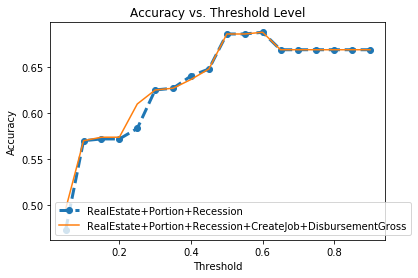

In [ ]:
Accuracy2=[]

for x in threshold_level:
    test_sba['Decision2'] = (test_sba['Risk_factor2'] >= x)
    accuracy_rate=(test_sba['Default']==test_sba['Decision2']).mean()
    Accuracy2.append(accuracy_rate)

plt.plot(threshold_level, Accuracy, label='RealEstate+Portion+Recession', marker='o',linewidth=3,linestyle='dashed')
plt.plot(threshold_level, Accuracy2, label='RealEstate+Portion+Recession+CreateJob+DisbursementGross')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold Level', fontsize=12)

So no significant difference in the accuracy vs. threshold curve between the two models.

Now we will calculate the cost of the test data set and plot against the theshold values.

In [ ]:
## These values were obtained from Assignment section 7.
tp_val = 0
tn_val = 0
fp_val = 1
fn_val = 5

Text(0.5, 1.0, 'Threshold vs. Cost')

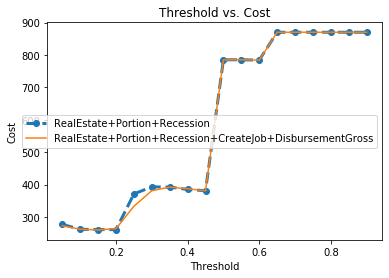

In [ ]:
Cost_change2=[]
for x in threshold_level:
    test_sba['Decision2'] = (test_sba['Risk_factor2'] >= x)
    outcome =np.array(test_sba['Default'])
    prediction = np.array(test_sba['Decision2'])
    ##conf_matrix = confusion_matrix(outcome, prediction)
    TN, FP, FN, TP = confusion_matrix(outcome, prediction).ravel()
    Cost = TN*tn_val + FP*fp_val + FN*fn_val + TP*tp_val
    Cost_change2.append(Cost)


plt.plot(threshold_level, Cost_change, label='RealEstate+Portion+Recession', marker='o',linewidth=3,linestyle='dashed')
plt.plot(threshold_level, Cost_change2, label='RealEstate+Portion+Recession+CreateJob+DisbursementGross')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Cost')
plt.title('Threshold vs. Cost', fontsize=12)


So, overall both accuracy and cost function don't change significantly over threshold values. This is expected from regression summary as p-value for CreateJob is always found to be above 0.05 which makes it insignificant in predcting the outcome. The p-value for DisbursementGross is also found to be above 0.05 for majority times run though randomly observed smaller (<0.05) p-value sometimes. But it's co-efiecnt is significantly lower and so have insignificnat effect on the outcome.